In [1]:
import warnings

warnings.filterwarnings("ignore")

# Feature Extraction

## distfit: Find The Best Theoretical Distribution For Your Data

In [ ]:
!pip install distfit

If you're looking to identify the best theoretical distribution for your data in Python, try distfit. It allows you to fit and compare multiple distributions, identifying the best match for your dataset.

[distfit] >fit..
[distfit] >transform..
[distfit] >[norm      ] [0.00 sec] [RSS: 0.0037316] [loc=-0.018 scale=2.999]
[distfit] >[expon     ] [0.00 sec] [RSS: 0.1588997] [loc=-14.019 scale=14.001]
[distfit] >[dweibull  ] [0.00 sec] [RSS: 0.0079433] [loc=-0.012 scale=2.529]
[distfit] >[t         ] [0.02 sec] [RSS: 0.0036884] [loc=-0.012 scale=2.873]
[distfit] >[genextreme] [0.07 sec] [RSS: 0.0049831] [loc=-1.132 scale=3.037]
[distfit] >[gamma     ] [0.04 sec] [RSS: 0.0038504] [loc=-101.098 scale=0.089]
[distfit] >[lognorm   ] [0.09 sec] [RSS: 0.0037897] [loc=-237.099 scale=237.056]
[distfit] >[uniform   ] [0.00 sec] [RSS: 0.1145382] [loc=-14.019 scale=24.469]
[distfit] >[loggamma  ] [0.04 sec] [RSS: 0.0036960] [loc=-239.858 scale=44.472]
[distfit] >Compute confidence interval [parametric]
[distfit] >plot..


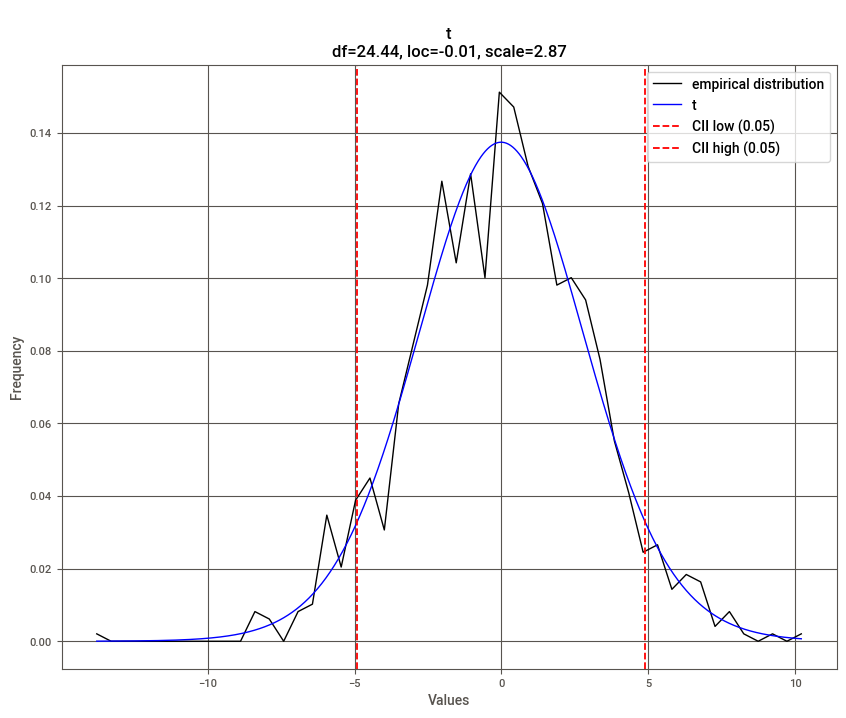

(<Figure size 1000x800 with 1 Axes>,
 <AxesSubplot:title={'center':'\nt\ndf=24.44, loc=-0.01, scale=2.87'}, xlabel='Values', ylabel='Frequency'>)

<IPython.core.display.Javascript object>

In [30]:
import numpy as np
from distfit import distfit

X = np.random.normal(0, 3, 1000)

## Initialize model
dist = distfit()

## Find best theoretical distribution for empirical data X
distribution = dist.fit_transform(X)
dist.plot()

Beyond finding the optimal distribution, `distfit` can also help identify outliers based on deviation from the fitted distribution.

[Link to distfit](https://github.com/erdogant/distfit).

## Geopy: Extract Location Based on Python String

In [ ]:
!pip install geopy

`Geopy` simplifies the process of extracting geospatial information from location strings. With just a few lines of code, you can obtain the coordinates of addresses globally.

In [2]:
from geopy.geocoders import Nominatim

geolocator = Nominatim(user_agent="find_location")
location = geolocator.geocode("30 North Circle Drive")

To get detailed information about the location:

In [3]:
location.address

'30, North Circle Drive, East Longmeadow, Hampden County, Massachusetts, 01028, United States'

You can also extract latitude and longitude:

In [14]:
location.latitude, location.longitude

(35.8796631, -79.0770546)

[Link to Geopy](https://github.com/geopy/geopy).

## fastai’s cont_cat_split: Separate Continuous and Categorical Variables

In [ ]:
!pip install fastai

Fastai's `cont_cat_split` method helps you automatically separate continuous and categorical columns in a DataFrame based on their cardinality.

In [6]:
import pandas as pd
from fastai.tabular.core import cont_cat_split

df = pd.DataFrame(
    {
        "col1": [1, 2, 3, 4, 5],
        "col2": ["a", "b", "c", "d", "e"],
        "col3": [1.0, 2.0, 3.0, 4.0, 5.0],
    }
)

cont_names, cat_names = cont_cat_split(df)
print("Continuous columns:", cont_names)
print("Categorical columns:", cat_names)

Continuous columns: ['col3']
Categorical columns: ['col1', 'col2']


<IPython.core.display.Javascript object>

In [7]:
cont_names, cat_names = cont_cat_split(df, max_card=3)
print("Continuous columns:", cont_names)
print("Categorical columns:", cat_names)

Continuous columns: ['col1', 'col3']
Categorical columns: ['col2']


<IPython.core.display.Javascript object>

[Link to the documentation](https://docs.fast.ai/tabular.core.html).

## Formulaic: Write Clear Feature Engineering Code

In [ ]:
!pip install formulaic

Feature engineering, especially for statistical models, often requires manually creating interaction terms, polynomial transformations, or encoding categorical variables. This can quickly become verbose and error-prone when using libraries like pandas or NumPy:

In [13]:
df = pd.DataFrame({"x": ["A", "B", "C"], "z": [0.3, 0.1, 0.2], "y": [0, 1, 2]})
print(df)

   x    z  y
0  A  0.3  0
1  B  0.1  1
2  C  0.2  2


In [12]:
import numpy as np
import pandas as pd

## Sample dataset
df = pd.DataFrame({"x": ["A", "B", "C"], "z": [0.3, 0.1, 0.2], "y": [0, 1, 2]})

## Manual feature engineering
df["x_B"] = (df["x"] == "B").astype(int)
df["x_C"] = (df["x"] == "C").astype(int)
df["z_squared"] = df["z"] ** 2

print(df)

   x    z  y  x_B  x_C  z_squared
0  A  0.3  0    0    0       0.09
1  B  0.1  1    1    0       0.01
2  C  0.2  2    0    1       0.04


Manually encoding categorical variables and creating polynomial features leads to repetitive code and increases the likelihood of errors, especially in larger datasets or more complex models.

Formulaic streamlines feature engineering by allowing you to define transformations and relationships in a single formula string, inspired by Wilkinson formulas.

In [8]:
from formulaic import Formula

## Define a formula for feature engineering
formula = "y ~ x + I(z**2)"

## Apply the formula to get the response and design matrices
y, X = Formula(formula).get_model_matrix(df)

print("Response (y):")
print(y)

print("\nDesign Matrix (X):")
print(X)

Response (y):
   y
0  0
1  1
2  2

Design Matrix (X):
   Intercept  x[T.B]  x[T.C]  I(z ** 2)
0        1.0       0       0       0.09
1        1.0       1       0       0.01
2        1.0       0       1       0.04


In this example:

- `"y ~ x + I(z**2)"`: The formula specifies that `y` is the response variable, `x` is a categorical predictor (automatically one-hot encoded), and `z**2` represents the square of `z`.
- `Formula.get_model_matrix()`: Automatically generates the response (`y`) and design matrix (`X`) based on the formula.

The output demonstrates how Formulaic automatically handles categorical encoding, interaction terms, and polynomial transformations, significantly simplifying feature engineering.

[Link to Formulaic](https://github.com/matthewwardrop/formulaic)

## yarl: Create and Extract Elements from a URL Using Python

In [ ]:
!pip install yarl

`yarl` makes URL parsing and creation easy. You can extract elements like host, path, and query from a URL or construct new URLs.

In [1]:
from yarl import URL

url = URL("https://github.com/search?q=data+science")
url

URL('https://github.com/search?q=data+science')

In [16]:
print(url.host)

github.com


In [17]:
print(url.path)

/search


In [18]:
print(url.query_string)

q=data science


You can also build new URLs:

In [8]:
# Create a URL

url = URL.build(
    scheme="https",
    host="github.com",
    path="/search",
    query={"p": 2, "q": "data science"},
)

print(url)

https://github.com/search?p=2&q=data+science


In [9]:
## Replace the query

print(url.with_query({"q": "python"}))

https://github.com/search?q=python


In [10]:
## Replace the path

new_path = url.with_path("khuyentran1401/Data-science")
print(new_path)

https://github.com/khuyentran1401/Data-science


In [11]:
## Update the fragment

print(new_path.with_fragment("contents"))

https://github.com/khuyentran1401/Data-science#contents


[Link to yarl](https://github.com/aio-libs/yarl).

## Pigeon: Quickly Annotate Your Data on Jupyter Notebook

In [ ]:
!pip install pigeon-jupyter

For fast data annotation within Jupyter Notebooks, use `Pigeon`. This tool allows you to label data interactively by selecting from predefined options.

In [ ]:
from pigeon import annotate

annotations = annotate(
    ["The service is terrible", "I will definitely come here again"],
    options=["positive", "negative"],
)

In [10]:
annotations

[('The service is terrible', 'negative'),
 ('I will definitely come here again', 'positive')]

![](../img/pigeon_demo.gif)

After labeling all your data, you can get the examples along with their labels by calling `annotations`.

[Link to Pigeon](https://github.com/agermanidis/pigeon)

## probablepeople: Parse Unstructured Names Into Structured Components

In [ ]:
!pip install probablepeople

`probablepeople` helps you parse unstructured names into structured components like first names, surnames, and company names.

In [21]:
import probablepeople as pp

pp.parse("Mr. Owen Harris II")

[('Mr.', 'PrefixMarital'),
 ('Owen', 'GivenName'),
 ('Harris', 'Surname'),
 ('II', 'SuffixGenerational')]

<IPython.core.display.Javascript object>

In [22]:
pp.parse("Kate & John Cumings")

[('Kate', 'GivenName'),
 ('&', 'And'),
 ('John', 'GivenName'),
 ('Cumings', 'Surname')]

<IPython.core.display.Javascript object>

In [23]:
pp.parse("Prefect Technologies, Inc")

[('Prefect', 'CorporationName'),
 ('Technologies,', 'CorporationName'),
 ('Inc', 'CorporationLegalType')]

<IPython.core.display.Javascript object>

[Link to probablepeople](https://github.com/datamade/probablepeople).

## Extract PDF Text Precisely with PyPDF

In [ ]:
!pip install fpdf pypdf

Extracting text from PDFs often results in including undesired elements like headers, footers, page numbers, or small captions due to the lack of semantic layers in PDF files.

PyPDF can split, merge, crop, transform, and manipulate PDFs. It also supports extracting text and metadata from PDF files, making it a powerful tool for PDF processing.

To demonstrate this, start with creating an example PDF:

In [65]:
from fpdf import FPDF
from pathlib import Path

# Create a duck-themed PDF with headers and body text
class DuckPDF(FPDF):
    def add_header(self, text):
        self.set_font("Arial", "B", 14)
        self.cell(0, 10, text, ln=True)

    def add_body(self, text):
        self.set_font("Arial", "", 9)
        self.multi_cell(0, 10, text)
        self.ln(5)

# Create and fill the PDF
pdf = DuckPDF()
pdf.add_page()
pdf.add_header("DUCK BIOLOGY")
pdf.add_body("Mallards are common ducks found in North America.\nThey have green heads and a yellow bill.")
pdf.add_header("Duck Habitats")
pdf.add_body("Ducks live near ponds, lakes, and marshes.\nThey build nests near the water and eat aquatic plants.")

# Save the PDF
duck_pdf_path = Path("duck_biology.pdf")
pdf.output(str(duck_pdf_path))

''

In [66]:
from PyPDF2 import PdfReader

## Extracting text without filtering headers, footers, or specific elements
reader = PdfReader("duck_biology.pdf")
page = reader.pages[0]
text = page.extract_text()
print(text)  # Outputs all text, including headers, footers, and other elements

DUCK BIOLOGY
Mallards are common ducks found in North America.
They have green heads and a yellow bill.
Duck Habitats
Ducks live near ponds, lakes, and marshes.
They build nests near the water and eat aquatic plants.


In the code above, the text extraction results in capturing all textual elements on the page, including headers, footers, and possibly formatting artifacts. This makes it challenging to focus only on the main content.

Using the `visitor_text` feature of PyPDF, you can precisely control the parts of the text to extract by applying custom logic, such as filtering out headers, footers, or small-font elements.

The code snippet below demonstrates how to filter out small-font text (e.g., headers, footers, or captions) by using a visitor function in the `extract_text` method.

In [69]:
from PyPDF2 import PdfReader

## Threshold to consider "small" text
SMALL_FONT_THRESHOLD = 10

## Prepare a list to store the filtered text
parts = []


## Visitor function to filter text based on font size
def visitor_body(text, cm, tm, font_dict, font_size):
    if font_size < SMALL_FONT_THRESHOLD:
        parts.append(text)

Explanation of parameters in the visitor function:
- `text`: This is the actual text string from the PDF that the visitor function processes. It contains the specific snippet of text that is currently being evaluated.
- `cm` (current transformation matrix): This matrix describes how the text is positioned and scaled on the page. For example, `cm[4]` and `cm[5]` represent the horizontal and vertical positions of the text, respectively.
- `tm` (text matrix): This describes the transformation applied in the text coordinate space. It is used internally to map text coordinates to the user space.
- `font_dict`: This is a dictionary containing font metadata (e.g., font type, style). For instance, it may include keys like `/BaseFont` with values such as `/Arial,Bold`.
- `font_size`: The font size of the current text snippet being processed. It is measured in text coordinate space and can be used to identify small text such as footers or captions.

Using the `extract_text` method with the `visitor_body` function allows us to extract only the desired text elements.

In [70]:
reader = PdfReader("duck_biology.pdf")
page = reader.pages[0]
page.extract_text(visitor_text=visitor_body)

## Combine all filtered parts into a single string
text_body = "".join(parts)

print(text_body)


Mallards are common ducks found in North America.
They have green heads and a yellow bill.
Ducks live near ponds, lakes, and marshes.
They build nests near the water and eat aquatic plants.


The extracted text is now free of page numbers or small-font elements like headers and footers, providing a cleaner and more focused output for further analysis.

[Link to PyPDF](https://github.com/py-pdf/pypdf).